In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import load_model
from keras.utils import to_categorical

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

import time
import os
import sys
import pickle


physical_devices = tf.config.experimental.list_physical_devices('GPU') 
for physical_device in physical_devices: 
    tf.config.experimental.set_memory_growth(physical_device, True)

Using TensorFlow backend.


# Load the model and show summary

In [2]:
saved_model= load_model('CascadeModel_S8_C1to7_Epochs50.h5')#layer = 'dense_6'
opt = keras.optimizers.Adam(learning_rate=1e-4)
saved_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
saved_model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_7 (TimeDist (None, 8, 9, 9, 32)       320       
_________________________________________________________________
time_distributed_8 (TimeDist (None, 8, 9, 9, 64)       18496     
_________________________________________________________________
time_distributed_9 (TimeDist (None, 8, 9, 9, 128)      73856     
_________________________________________________________________
time_distributed_10 (TimeDis (None, 8, 10368)          0         
_________________________________________________________________
time_distributed_11 (TimeDis (None, 8, 1024)           10617856  
_________________________________________________________________
time_distributed_12 (TimeDis (None, 8, 1024)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 8, 8)             

/home/sweet/2-coursework/725bmes/eeg_deeplearning/neural_network/lib/python3.6/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


# Load the training and testing dataset

In [3]:
with open("CascadeModel_trainData.pickle", "rb") as f:
    Dataset = pickle.load(f)
    
X_train = Dataset[0]
X_test = Dataset[1]
y_train = Dataset[2]
y_test = Dataset[3]

In [5]:
_, accuracy = saved_model.evaluate(X_test, to_categorical(y_test-1), verbose=1)

66062/66062 [==============================] - 11s 166us/step


In [8]:
X_test.shape

(66062, 8, 9, 9, 1)

# Run predictions on the testing set

In [4]:
predictions = saved_model.predict(X_test,batch_size=64, verbose=1)

66062/66062 [==============================] - 131s 2ms/step


# Define function to plot a nice confusion matrix (found online)

In [8]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues, saveFig=False, figName='test.pdf'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    if normalize:
        im = ax.imshow(cm, interpolation='nearest', vmin=0, vmax=1, cmap=cmap)
    else:
        im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.xlim(-0.5, len(np.unique(y_true))-0.5)
    plt.ylim(len(np.unique(y_true))-0.5, -0.5)
    
    if saveFig:
        plt.savefig(figName)
    return plt, ax

# Plot the confusion matrix

Confusion matrix, without normalization
[[7932  355  194  131  245  237  308]
 [ 294 7866  437  127  112   92  302]
 [ 168  334 8174  289  181  289  128]
 [ 202  154  450 7793  292  171  412]
 [ 247  148  238  294 7993  247  184]
 [ 226  103  375  103  221 8189  305]
 [ 209  387  144  266   96  250 8168]]


NameError: name 'saveFit' is not defined

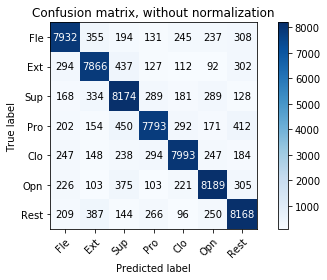

In [9]:
class_names = np.array(['Fle', 'Ext', 'Sup', 'Pro', 'Clo','Opn','Rest'])
plt,ax =plot_confusion_matrix(y_test-1, predictions.argmax(axis=1), classes=class_names,
                      title='Confusion matrix, without normalization', saveFit=False)
plt,ax =plot_confusion_matrix(y_test-1, predictions.argmax(axis=1), classes=class_names, normalize=True,
                      title='Normalized confusion matrix', saveFit=False)

